# Visuals 

### libraries to help make my visual

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
cd "Data Set"


C:\Users\artur\Documents\Tanzania-wells----project_3\Data Set


In [5]:
data_X = pd.read_csv('X.csv')
data_y = pd.read_csv('y.csv')

In [6]:
data_water = data_X.merge(data_y, how='inner', on='id') 
print(data_water.shape)
data_water.head()


(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
data_water.drop(columns= ['id', 'funder', 'installer', 'num_private', 'scheme_management', 'scheme_name', 'permit', 'amount_tsh',
           `              'waterpoint_type_group', 'source', 'region_code', 'district_code', 'management_group', 'payment_type',
                          'extraction_type', 'extraction_type_group', 'recorded_by', 'ward', 'lga', 'wpt_name', 'subvillage', 
                          'quantity_group', 'longitude', 'latitude', 'date_recorded', 'water_quality' ], axis=1, inplace=True)

In [22]:
regions_p = data_water.groupby('region')['public_meeting'].sum().reset_index()
regions_p = regions_p.sort_values('public_meeting', ascending=False)

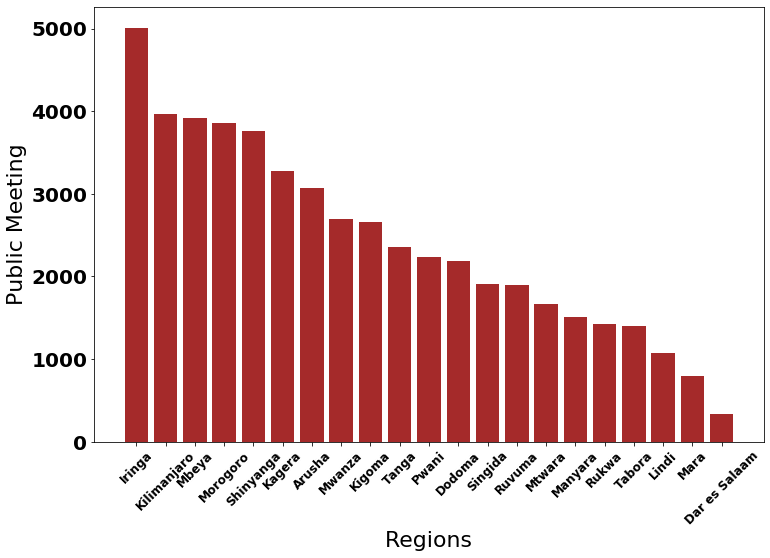

In [23]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=20) 
plt.bar(regions_p['region'], regions_p['public_meeting'] , color = 'brown')
plt.ylabel('Public Meeting')
plt.xlabel('Regions')
plt.xticks(range(0,21), rotation=45)
plt.savefig('region')

plt.show()

# Regions and their Functionality

In [25]:
variables = data_water.status_group.unique()
variables

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [26]:
dfs = {}

for variable in variables:
    frame = data_water[data_water.status_group == variable]
    dfs[variable] = frame

In [30]:
dfs['functional']

,gps_height,basin,region,population,public_meeting,construction_year,extraction_type_class,management,payment,quality_group,quantity,source_type,source_class,waterpoint_type,status_group
0,1390,Lake Nyasa,Iringa,109,True,1999,gravity,vwc,pay annually,good,enough,spring,groundwater,communal standpipe,functional
1,1399,Lake Victoria,Mara,280,NaN,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,686,Pangani,Manyara,250,True,2009,gravity,vwc,pay per bucket,good,enough,dam,surface,communal standpipe multiple,functional
4,0,Lake Victoria,Kagera,0,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional
5,0,Pangani,Tanga,1,True,2009,submersible,vwc,pay per bucket,salty,enough,other,unknown,communal standpipe multiple,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,1210,Pangani,Kilimanjaro,125,True,1999,gravity,water board,pay per bucket,good,enough,spring,groundwater,communal standpipe,functional
59396,1212,Rufiji,Iringa,56,True,1996,gravity,vwc,pay annually,good,enough,river/lake,surface,communal standpipe,functional
59397,0,Rufiji,Mbeya,0,True,0,handpump,vwc,pay monthly,fluoride,enough,borehole,groundwater,hand pump,functional
59398,0,Rufiji,Dodoma,0,True,0,handpump,vwc,never pay,good,insufficient,shallow well,groundwater,hand pump,functional


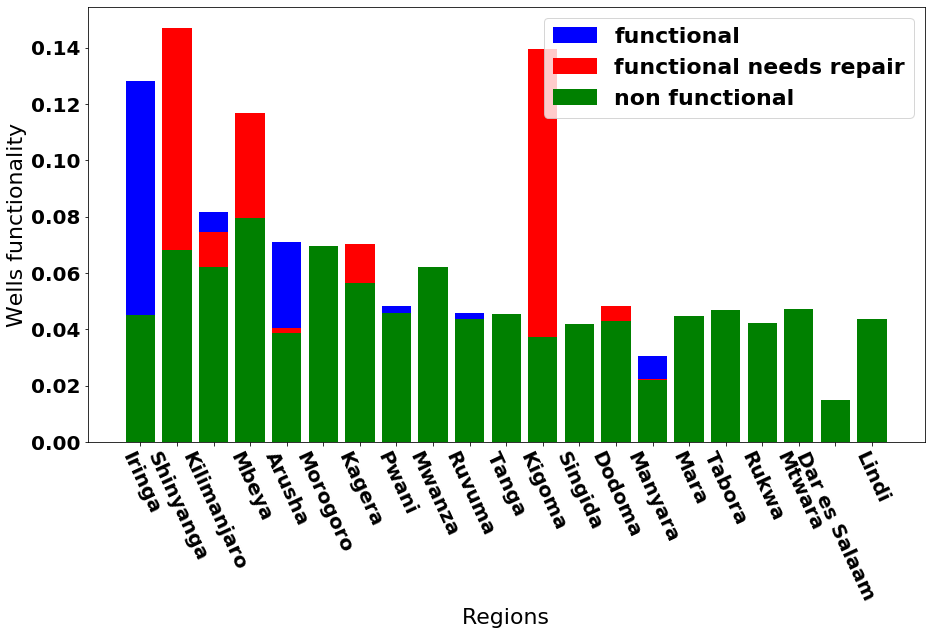

In [41]:

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.bar(dfs['functional']['region'].value_counts(normalize=True).index, dfs['functional']['region'].value_counts(normalize=True).values, color = 'blue')
plt.bar(dfs['functional needs repair']['region'].value_counts(normalize=True).index, dfs['functional needs repair']['region'].value_counts(normalize=True).values, color = 'red')
plt.bar(dfs['non functional']['region'].value_counts(normalize=True).index, dfs['non functional']['region'].value_counts(normalize=True).values, color = 'green')

plt.xticks(range(0,21), rotation=655)
plt.xlabel('Regions')
plt.ylabel('Wells functionality')
plt.legend(['functional', 'functional needs repair', 'non functional'])
plt.savefig('regions all in one')

plt.show()


#### The graph is in percantages and at first I wanted to compare regions and how many wells of functionality each region has. The graph should be viewed with the same color of bars and is showing what region is contributing the most to either function

In [37]:
dfs['functional']['region'].value_counts().index == dfs['non functional']['region'].value_counts().index

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [40]:
print(dfs['non functional']['region'].value_counts())


Mbeya            1816
Morogoro         1587
Shinyanga        1558
Mwanza           1417
Kilimanjaro      1417
Kagera           1285
Mtwara           1080
Tabora           1066
Pwani            1043
Tanga            1038
Iringa           1030
Mara             1023
Ruvuma            996
Lindi             993
Dodoma            983
Rukwa             966
Singida           954
Arusha            881
Kigoma            850
Manyara           500
Dar es Salaam     341
Name: region, dtype: int64
